In [49]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle

In [50]:
#crazy data separated with semicolons for some reason, tho its called "comma" separated values
data = pd.read_csv("student-mat.csv", sep=";")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [51]:
data = data[["G1", "G2", "G3", "studytime", "failures"]]
#gonna use the data to predict value of G3
predict = "G3"
print(data.shape)

(395, 5)


In [52]:
#splitting the data into X and Y, Y being the final grade G3
#X being the input values we'll use to train the model to predict G3
X = np.array(data.drop([predict], 1))
Y = np.array(data[predict])
print(X.shape)
print(Y.shape)

(395, 4)
(395,)


In [53]:
#split data into training and test sets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.1)

In [54]:
# #linear regression model instantiated
# linear_regression = linear_model.LinearRegression()

# #fit x and y training values to get best fit
# linear_regression.fit(X_train, y_train)

# #accuracy of test sets
# accuracy = linear_regression.score(X_test, y_test)
# print(accuracy)

In [55]:
# #Coefficients for each x input (g1, g2, studytime, failures)
# print("Coefficient:", linear_regression.coef_)
# print("Intercept:", linear_regression.intercept_)

In [56]:
#predicted value [the 4 x values used for prediction] the ground truth
# predictions = linear_regression.predict(X_test)
# for i in range(len(predictions)):
#     print(predictions[i], X_test[i], y_test[i])

#an actual prediction
# test_value = [[17, 17, 4, 0]]
#ground truth => 18
#Predicted value => 17.3
# print(linear_regression.predict(test_value))

In [57]:
# import matplotlib.pyplot as pyplot
# import pickle
# from matplotlib import style

# #Save our model - write/read binary mode
# with open ("Studentmodel.pickle", "wb") as f:
#     pickle.dump(linear_regression, f)
    
# #load our model into our linear regression variable
# pickle_in = open("Studentmodel.pickle", "rb")
# linear_regression = pickle.load(pickle_in)

In [58]:
# best_accuracy = 0

# #wanna choose best accuracy we can get over a period of 30 iterations
# for _ in range(30):
#     X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.1)
#     linear_regression = linear_model.LinearRegression()

#     linear_regression.fit(X_train, y_train)

#     accuracy = linear_regression.score(X_test, y_test)
#     print(accuracy)
    
#     if accuracy > best_accuracy:
#         best_accuracy = accuracy
#         with open ("Studentmodel.pickle", "wb") as f:
#             pickle.dump(linear_regression, f)
        
# pickle_in = open("Studentmodel.pickle", "rb")
# linear_regression = pickle.load(pickle_in)

# print("Coefficient:", linear_regression.coef_)
# print("Intercept:", linear_regression.intercept_)

# predictions = linear_regression.predict(X_test)
# for i in range(len(predictions)):
#     print(predictions[i], X_test[i], y_test[i])

In [59]:
#Now our model will be with the highest accuracy 😱

In [62]:
#No need to continuosly train the model, we saved it yea
pickle_in = open("Studentmodel.pickle", "rb")
linear_regression = pickle.load(pickle_in)

print("Coefficient:", linear_regression.coef_)
print("Intercept:", linear_regression.intercept_)

predictions = linear_regression.predict(X_test)
for i in range(len(predictions)):
    print(predictions[i], X_test[i], y_test[i])
    
print()
print("Best Accuracy Model:")
accuracy = linear_regression.score(X_test, y_test)
print(accuracy)

Coefficient: [ 0.14547865  0.99302643 -0.21155626 -0.29569041]
Intercept: -1.3187115910435452
10.776998648884279 [13 11  2  1] 11
-0.36643867982232725 [8 0 1 0] 0
14.263324617205479 [13 14  1  0] 13
13.058741921215173 [13 13  2  0] 13
-0.2870376491955129 [10  0  2  0] 0
15.335752080917946 [15 15  2  0] 16
15.19027343415221 [14 15  2  0] 15
18.96282358337676 [18 18  1  0] 18
18.685189704333187 [19 18  3  0] 19
14.833238524481825 [13 15  3  0] 15
8.71627786471428 [9 9 1 0] 9
9.643226681661014 [10 10  2  0] 10
10.7817317615124 [11 11  2  0] 11
10.843076265023198 [12 11  1  1] 12
7.802652462255443 [11  8  2  0] 8
3.950701282404081 [5 5 2 0] 5
8.142953579511119 [10  9  3  1] 9
12.277271751034174 [13 12  1  0] 12
13.058741921215173 [13 13  2  0] 13
16.117222251098944 [15 16  3  0] 18
16.540334776908253 [15 16  1  0] 15
5.195161576862352 [6 7 2 3] 0
18.60578867370637 [17 18  2  0] 18
9.431670418756362 [10 10  3  0] 9
9.643226681661014 [10 10  2  0] 10
12.635629395405868 [13 13  4  0] 12
9.563

Text(0, 0.5, 'Label')

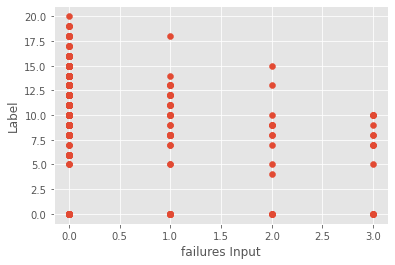

In [71]:
style.use("ggplot")

#plot x against y, to visualize effect of variables on the output G3 value
_x = 'failures'
pyplot.scatter(data[_x], data['G3'])
pyplot.xlabel(_x + " Input")
pyplot.ylabel("Label")

#Notice the correlation, thats why linear regression is best here